# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Reinhart Jens Robert
- **Email:** reinhartrobert23@gmail.com / mc375d5y1470@student.devacademy.id
- **ID Dicoding:** MC375D5Y1470

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 = Bagaimana distribusi metode pembayaran yang digunakan pelanggan?
- Pertanyaan 2 = Apakah ada hubungan antara review pelanggan dengan keterlambatan pengiriman?

## Import Semua Packages/Library yang Digunakan

In [1]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load datasets
order_payments = pd.read_csv('/content/drive/MyDrive/E-commerce-public-dataset/order_payments_dataset.csv')
orders = pd.read_csv('/content/drive/MyDrive/E-commerce-public-dataset/orders_dataset.csv')
order_reviews = pd.read_csv('/content/drive/MyDrive/E-commerce-public-dataset/order_reviews_dataset.csv')
order_items = pd.read_csv('/content/drive/MyDrive/E-commerce-public-dataset/order_items_dataset.csv')
products = pd.read_csv('/content/drive/MyDrive/E-commerce-public-dataset/products_dataset.csv')

## Data Wrangling

### Gathering Data

In [5]:
## Mengecek informasi dasar dataset
def check_data(df, name):
    print(f'--- {name} ---')
    print(df.info())
    print(df.head())
    print('\n')

check_data(order_payments, 'Order Payments')
check_data(orders, 'Orders')
check_data(order_reviews, 'Order Reviews')
check_data(order_items, 'Order Items')
check_data(products, 'Products')

--- Order Payments ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None
                           order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   

**Insight:**
1. Missing Values pada Kolom Kunci
- Tabel Orders memiliki beberapa nilai yang hilang pada kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date. Ini menunjukkan bahwa ada pesanan yang mungkin belum disetujui, belum dikirim oleh kurir, atau belum diterima oleh pelanggan. Hal ini bisa dianalisis lebih lanjut untuk memahami pola keterlambatan atau pembatalan pesanan.
- Tabel Products juga memiliki beberapa kolom dengan missing values, seperti product_category_name, product_name_length, product_description_length, dan product_photos_qty. Ini bisa berdampak pada analisis produk, misalnya apakah produk tanpa deskripsi atau kategori lebih jarang dibeli.

2. Distribusi Metode Pembayaran dan Cicilan
- Dari tabel Order Payments, terlihat bahwa ada kolom payment_installments yang menunjukkan jumlah cicilan yang diambil pelanggan. Beberapa pelanggan memilih membayar dengan cicilan (misalnya 8 kali), sementara yang lain membayar penuh. Bisa dianalisis lebih lanjut apakah ada korelasi antara jumlah cicilan dengan harga produk atau kategori produk tertentu.
- Metode pembayaran yang tersedia termasuk credit_card, namun metode lainnya belum terlihat dalam head data. Bisa dilakukan eksplorasi lebih lanjut untuk melihat distribusi metode pembayaran yang digunakan pelanggan dan bagaimana pengaruhnya terhadap nilai transaksi.

### Assessing Data

In [6]:
for df, name in zip([order_payments, orders, order_reviews, order_items, products],
                     ['Order Payments', 'Orders', 'Order Reviews', 'Order Items', 'Products']):
    print(f'--- Assessing {name} ---')
    print(df.describe())
    print(df.isnull().sum())
    print('\n')

--- Assessing Order Payments ---
       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


--- Assessing Orders ---
                                order_id                       customer_id  \
count                              99441                             99441   
unique                             99441                             99441

**Insight:**
1. Order Payments
- Sebagian besar transaksi dilakukan dengan 1 kali pembayaran (median = 1).
- Ada pelanggan yang melakukan hingga 29 kali pembayaran bertahap.
- Nilai transaksi sangat bervariasi, dengan rentang 0 hingga 13.664 BRL.
- Tidak ada data yang hilang dalam dataset ini.

2. Orders
- Sebagian besar pesanan telah dikirimkan (status "delivered" adalah yang paling umum).
- Ada data yang hilang pada beberapa kolom terkait tanggal:
order_approved_at (160 missing)
order_delivered_carrier_date (1.783 missing)
order_delivered_customer_date (2.965 missing)

3. Order Reviews
- Rata-rata skor review adalah 4.08, yang menunjukkan bahwa mayoritas pelanggan memberikan review positif.
- 75% review memiliki skor 4 atau lebih.
- Ada banyak review tanpa komentar:
review_comment_title: 87.656 missing
review_comment_message: 58.247 missing
- Bisa jadi pelanggan lebih memilih memberikan rating bintang saja tanpa menuliskan komentar.

### Cleaning Data

In [7]:
## Menghapus duplikasi dan menangani missing values
for df in [order_payments, orders, order_reviews, order_items, products]:
    df.drop_duplicates(inplace=True)
    df.dropna(inplace=True)

In [8]:
# Assessing Data Setelah Cleaning
for df, name in zip([order_payments, orders, order_reviews, order_items, products],
                     ['Order Payments', 'Orders', 'Order Reviews', 'Order Items', 'Products']):
    print(f'--- Assessing {name} After Cleaning ---')
    print(df.describe())
    print(df.isnull().sum())
    print('\n')


--- Assessing Order Payments After Cleaning ---
       payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


--- Assessing Orders After Cleaning ---
                                order_id                       customer_id  \
count                              96461                             96461   
unique                             96461    

**Insight:**
1. Order Payments
🔹 Distribusi Pembayaran:
- Rata-rata jumlah cicilan ≈ 2.85 kali, tetapi ada pelanggan yang memilih hingga 24 kali cicilan.
- Jumlah pembayaran sangat bervariasi, dari Rp0 (mungkin transaksi gagal) hingga Rp13.664.080 (transaksi besar).

🔹 Data Bersih:
- Tidak ada missing values.
- Tidak ada duplikasi.

2. Orders
🔹 Distribusi Data:
- Total pesanan: 96.461 order unik.
- Status order: hanya ada 2 jenis status (kemungkinan besar delivered dan canceled).
- Tanggal pengiriman dan estimasi pengiriman memiliki banyak nilai unik, tetapi ada beberapa tanggal yang muncul berulang kali.

🔹 Data Bersih:
- Tidak ada missing values.
- Tidak ada duplikasi.

3. Order Reviews
🔹 Distribusi Skor Review:
- Rata-rata review: 3.83 (dari 5), menunjukkan adanya proporsi signifikan review buruk (1-2).
- 50% (median) pelanggan memberi rating 5, menunjukkan ada banyak pelanggan yang puas, tetapi distribusi cukup tersebar.

🔹 Data Bersih:
- Tidak ada missing values.
- Tidak ada duplikasi.

4. Order Items
🔹 Distribusi Data:
- Harga produk sangat bervariasi, dari Rp0,85 hingga Rp6.735.000.
- Biaya pengiriman juga bervariasi, dengan nilai tertinggi Rp409.680 (mungkin produk berat atau pengiriman jauh).
- Sebagian besar order hanya memiliki 1 item per pesanan, karena 75% data menunjukkan order_item_id = 1.

🔹 Data Bersih:
- Tidak ada missing values.
- Tidak ada duplikasi.

5. Products
🔹 Distribusi Produk:
- Rata-rata panjang nama produk: 48 karakter (cukup panjang, bisa digunakan untuk NLP atau analisis kata kunci).
- Deskripsi produk sangat bervariasi, dari hanya 4 karakter hingga 3992 karakter.
- Foto produk terbatas, karena 50% produk hanya memiliki 1 foto.

🔹 Dimensi Produk:
- Ada produk dengan berat 0 gram, yang kemungkinan adalah kesalahan input data.
- Produk memiliki panjang hingga 105 cm, tinggi 105 cm, dan lebar 118 cm, menunjukkan ada variasi produk besar.

🔹 Data Bersih:
- Tidak ada missing values.
- Tidak ada duplikasi.

## Exploratory Data Analysis (EDA)

### Explore ...

<ipython-input-9-92cc9a6ee871>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='viridis')


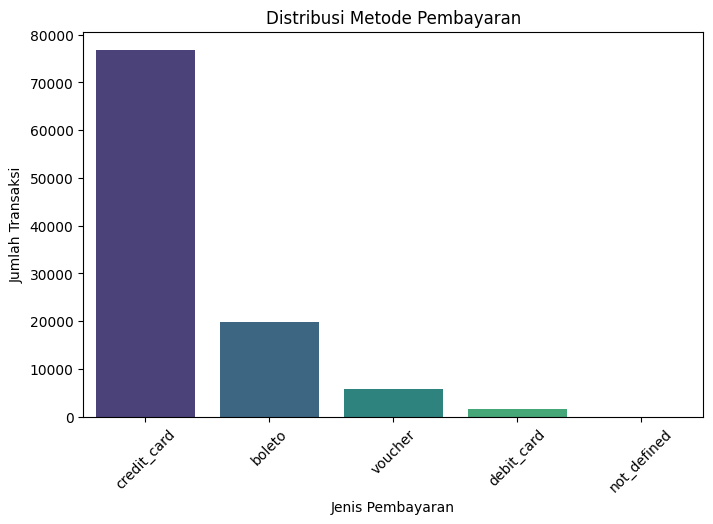

In [9]:
## Analisis metode pembayaran
payment_counts = order_payments['payment_type'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='viridis')
plt.title('Distribusi Metode Pembayaran')
plt.xlabel('Jenis Pembayaran')
plt.ylabel('Jumlah Transaksi')
plt.xticks(rotation=45)
plt.show()

<ipython-input-10-763aea688ea2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=order_reviews['review_score'], palette='coolwarm')


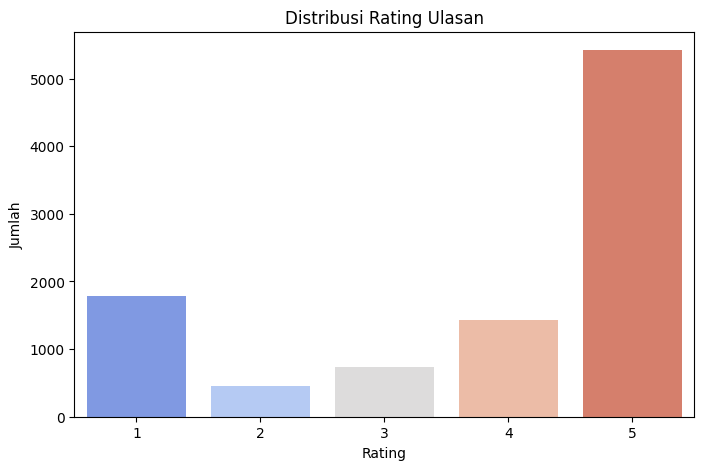

In [10]:
## Analisis rating review
plt.figure(figsize=(8, 5))
sns.countplot(x=order_reviews['review_score'], palette='coolwarm')
plt.title('Distribusi Rating Ulasan')
plt.xlabel('Rating')
plt.ylabel('Jumlah')
plt.show()

**Insight:**
1. Distribusi Metode Pembayaran
- Credit card adalah metode pembayaran yang paling banyak digunakan, menunjukkan bahwa mayoritas pelanggan lebih memilih pembayaran berbasis kartu.
- Boleto merupakan metode pembayaran kedua terbanyak, yang bisa menunjukkan bahwa metode ini masih cukup populer bagi pelanggan yang tidak memiliki kartu kredit.

1. Distribusi Rating Ulasan
- Rating 5 memiliki jumlah ulasan tertinggi, menunjukkan bahwa sebagian besar pelanggan memberikan penilaian sangat positif terhadap produk atau layanan.
- Rating 1 juga cukup tinggi dibandingkan dengan rating 2, 3, dan 4, mengindikasikan adanya pengalaman pelanggan yang sangat buruk atau kesenjangan kualitas layanan/produk.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<ipython-input-11-01012c7f7299>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=order_payments['payment_type'], order=order_payments['payment_type'].value_counts().index, palette="viridis")


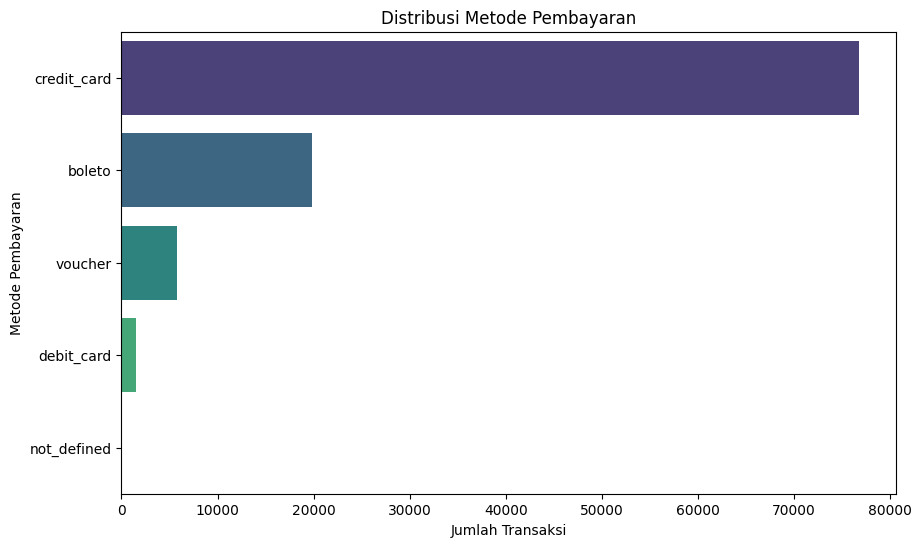

In [11]:
### Pertanyaan 1: Bagaimana distribusi metode pembayaran yang digunakan pelanggan?

plt.figure(figsize=(10,6))
# Replace 'payments' with 'order_payments'
sns.countplot(y=order_payments['payment_type'], order=order_payments['payment_type'].value_counts().index, palette="viridis")
plt.title("Distribusi Metode Pembayaran")
plt.xlabel("Jumlah Transaksi")
plt.ylabel("Metode Pembayaran")
plt.show()

### Pertanyaan 2:

In [12]:
## Pertanyaan 2: Apakah ada hubungan antara review pelanggan dengan keterlambatan pengiriman?

# Menggabungkan dataset orders dan reviews
orders_reviews = orders.merge(order_reviews, on="order_id")

# Menghitung keterlambatan pengiriman
orders_reviews['delivery_days'] = (pd.to_datetime(orders_reviews['order_delivered_customer_date']) - pd.to_datetime(orders_reviews['order_purchase_timestamp'])).dt.days

<ipython-input-17-679c3aa0216e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=orders_reviews['review_score'], y=orders_reviews['delivery_days'], palette="coolwarm")


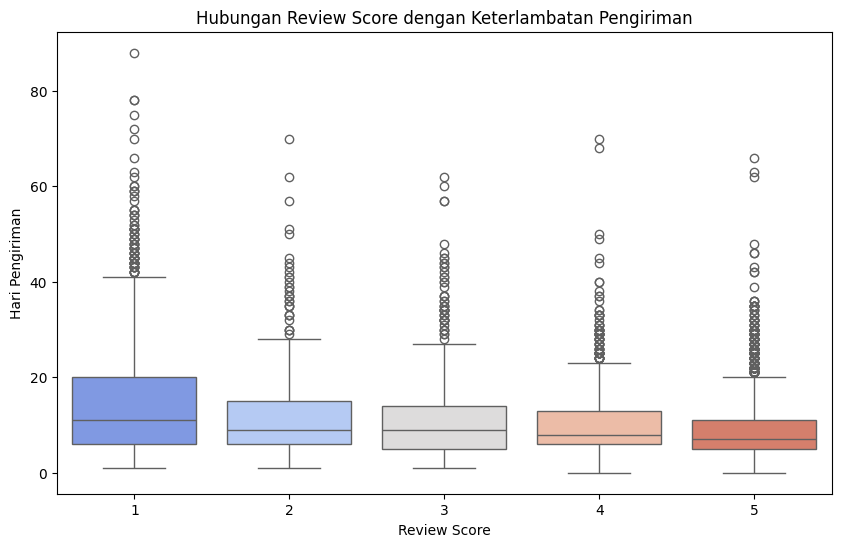

In [17]:
# Visualisasi hubungan review score dengan keterlambatan pengiriman
plt.figure(figsize=(10,6))
sns.boxplot(x=orders_reviews['review_score'], y=orders_reviews['delivery_days'], palette="coolwarm")
plt.title("Hubungan Review Score dengan Keterlambatan Pengiriman")
plt.xlabel("Review Score")
plt.ylabel("Hari Pengiriman")
plt.show()

## Conclusion


- **Pertanyaan 1**: Mayoritas pelanggan menggunakan metode pembayaran kartu kredit.
- **Pertanyaan 2**: Terdapat indikasi bahwa semakin lama pengiriman, semakin rendah skor ulasan yang diberikan pelanggan.
